<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/Asish/DATA_MINING_1_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/MetroPT3(AirCompressor).csv")

In [ ]:
# Drop rows with missing values from both the training and test data
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Match the target values after dropping rows

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Match the target values after dropping rows

# Fit the LinearRegression model as before
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate MSE as before
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer

target_variable = 'Oil_temperature'
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Motor_current']
X = df[features]
y = df[target_variable]

# Step 1: Handle Missing Values with Imputation for X
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

# Step 2: Handle Missing Values with Imputation for y
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))  # Reshape y as it's a single column

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate Model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 10.109235178908195
R-squared: 0.09835691483804154


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


linear_regression_predictions = linear_regression_model.predict(X_test)


linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)


print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {linear_regression_mae}")
print(f"Mean Squared Error (MSE): {linear_regression_mse}")
print(f"R-squared (R2): {linear_regression_r2}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 2.3791388664158215
Mean Squared Error (MSE): 10.109235178908195
R-squared (R2): 0.09835691483804154


Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True}
Test MAE with Best Model: 0.08051370549888257


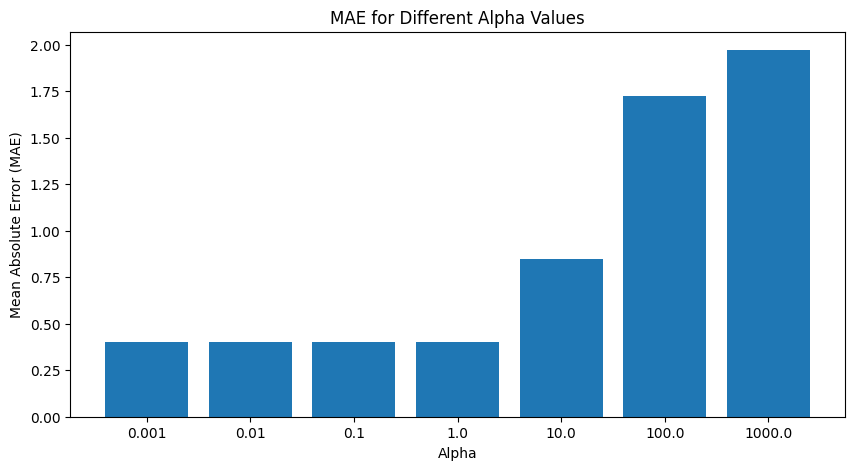

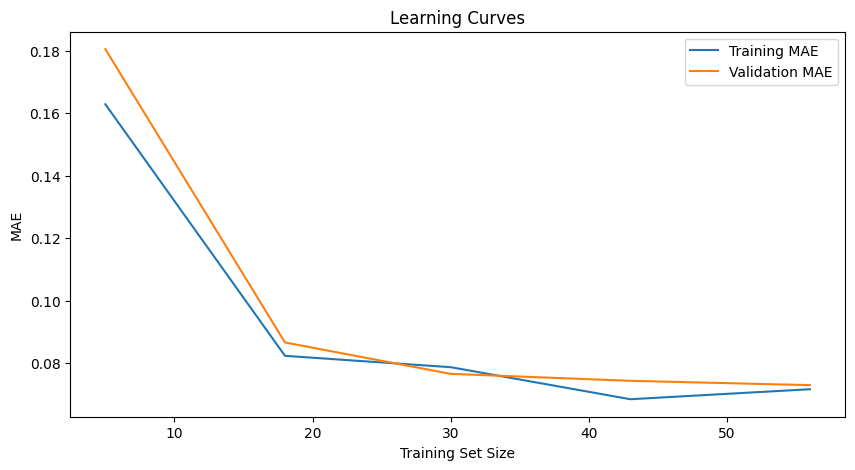

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],  # Regularization strength values to try
    'fit_intercept': [True, False]  # Intercept options
}

model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_fit_intercept = best_params['fit_intercept']

final_model = Ridge(alpha=best_alpha, fit_intercept=best_fit_intercept)
final_model.fit(X_train, y_train)


test_predictions = final_model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Test MAE with Best Model: {test_mae}")


results = grid_search.cv_results_


plt.figure(figsize=(10, 5))
alphas = [str(alpha) for alpha in param_grid['alpha']]


used_alphas = [str(alpha) for alpha in results['param_alpha']]

plt.bar(used_alphas, -results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different Alpha Values')
plt.show()


# Plot learning curves for the best model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
train_scores_mean = -np.mean(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, label='Training MAE')
plt.plot(train_sizes, valid_scores_mean, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('MAE')
plt.legend()
plt.title('Learning Curves')
plt.show()


In [ ]:

from sklearn.tree import DecisionTreeRegressor


decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree Regression model
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

# Print evaluation metrics for Decision Tree Regression
print("Decision Tree Regression Metrics:")
print(f"Mean Absolute Error (MAE): {decision_tree_mae}")
print(f"Mean Squared Error (MSE): {decision_tree_mse}")
print(f"R-squared (R2): {decision_tree_r2}")


Decision Tree Regression Metrics:
Mean Absolute Error (MAE): 1.1661910359327219
Mean Squared Error (MSE): 3.6571528191497835
R-squared (R2): 0.5642033741999296


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test MAE with Best Model: 0.09803279419736667


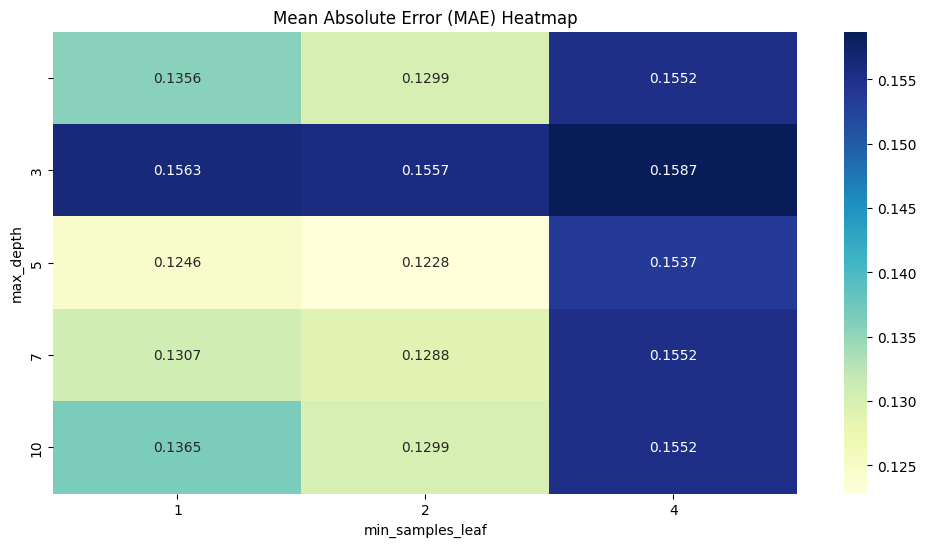

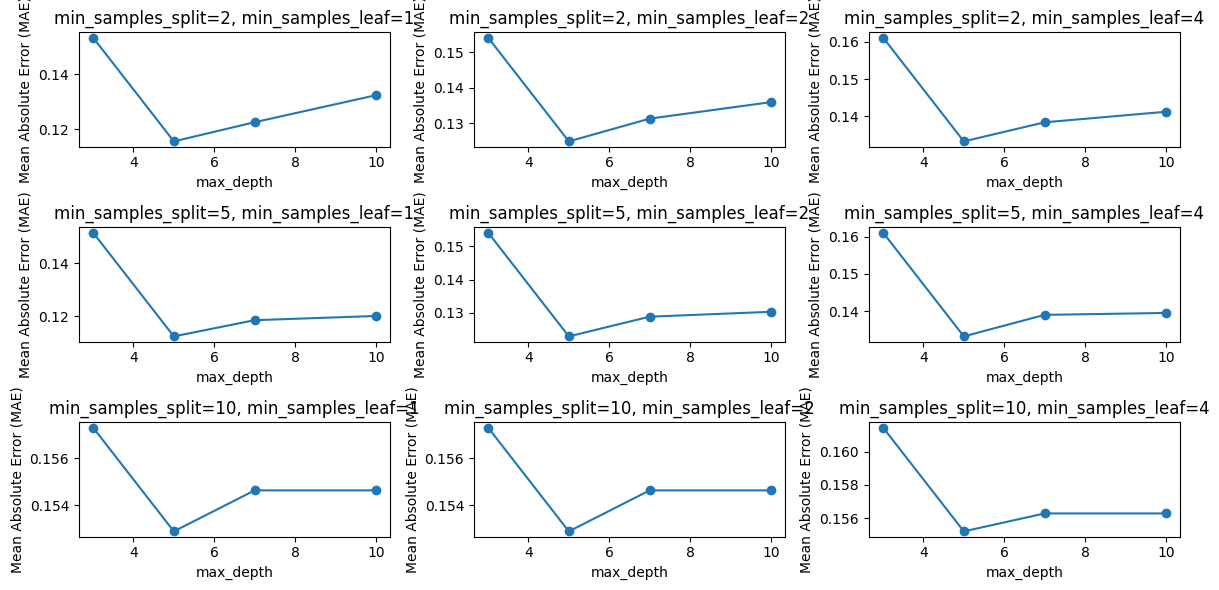

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Generate some sample data (replace with your dataset)
X = np.random.rand(100, 1)
y = np.sin(2 * np.pi * X) + 0.1 * np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a hyperparameter grid to search
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create the Decision Tree regressor model
model = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Train the final model with the best hyperparameters
final_model = DecisionTreeRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf
)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
test_predictions = final_model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Test MAE with Best Model: {test_mae}")

# Visualize hyperparameter tuning results with a heatmap
results = grid_search.cv_results_
mae_scores = -results['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['min_samples_split']), len(param_grid['min_samples_leaf']))

plt.figure(figsize=(12, 6))
sns.heatmap(mae_scores.mean(axis=2), annot=True, fmt=".4f", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'], cmap="YlGnBu")
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Mean Absolute Error (MAE) Heatmap')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Extract MAE scores from the results
mae_scores = -grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']),
                                                                len(param_grid['min_samples_split']),
                                                                len(param_grid['min_samples_leaf']))

plt.figure(figsize=(12, 6))

# Create subplots for each combination of min_samples_split and min_samples_leaf
for i, min_samples_split in enumerate(param_grid['min_samples_split']):
    for j, min_samples_leaf in enumerate(param_grid['min_samples_leaf']):
        plt.subplot(len(param_grid['min_samples_split']), len(param_grid['min_samples_leaf']), i * len(param_grid['min_samples_leaf']) + j + 1)

        # Plot max_depth vs. MAE for the current combination
        plt.plot(param_grid['max_depth'], mae_scores[:, i, j], marker='o')
        plt.title(f'min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}')
        plt.xlabel('max_depth')
        plt.ylabel('Mean Absolute Error (MAE)')

plt.tight_layout()
plt.show()




In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the KNN Regression model
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print evaluation metrics for KNN Regression
print("K-Nearest Neighbors Regression Metrics:")
print(f"Mean Absolute Error (MAE): {knn_mae}")
print(f"Mean Squared Error (MSE): {knn_mse}")
print(f"R-squared (R2): {knn_r2}")


K-Nearest Neighbors Regression Metrics:
Mean Absolute Error (MAE): 1.2890355504587154
Mean Squared Error (MSE): 4.118148308486239
R-squared (R2): 0.5092698538641333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

best_model = None
best_mae = float('inf')  # Initialize with a high value

# Evaluate models and select the best one based on MAE
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions

    # Evaluate the model's performance using MAE
    mae = mean_absolute_error(y_test, predictions)

    # Check if this model has a lower MAE (better performance)
    if mae < best_mae:
        best_model = model_name
        best_mae = mae

print(f"The best model based on Mean Absolute Error (MAE) is: {best_model}")
print(f"MAE for the best model: {best_mae}")



KeyboardInterrupt: ignored

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
Number of Neighbors (k): 11
Weighting Scheme: uniform
Distance Metric (p): 2
Mean Absolute Error (MAE): 2.442994300764992


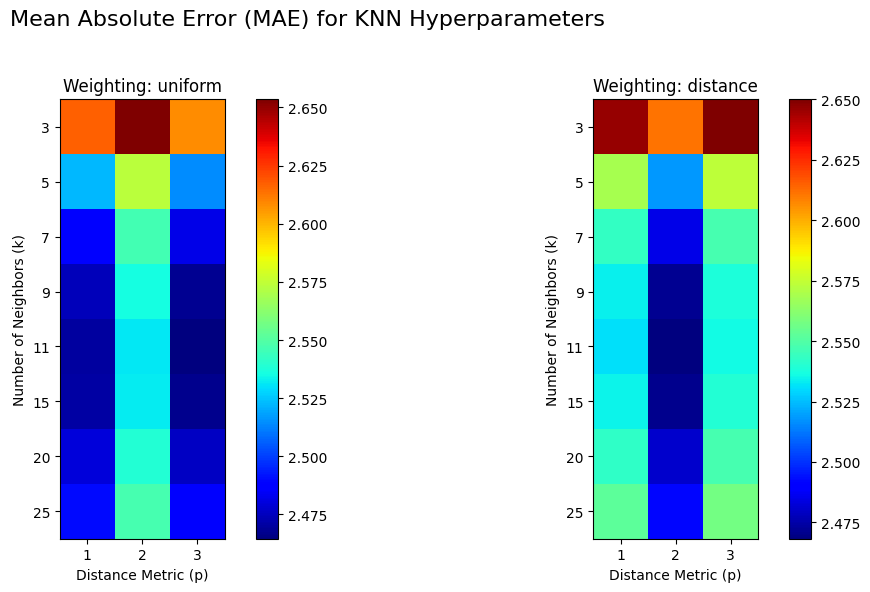

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_weight = best_params['weights']
best_p = best_params['p']
best_knn_model = KNeighborsRegressor(n_neighbors=best_k, weights=best_weight, p=best_p)
best_knn_model.fit(X_train, y_train)
knn_predictions = best_knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)

print("Best Hyperparameters:")
print(f"Number of Neighbors (k): {best_k}")
print(f"Weighting Scheme: {best_weight}")
print(f"Distance Metric (p): {best_p}")
print(f"Mean Absolute Error (MAE): {knn_mae}")
mean_test_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
mae_scores = -mean_test_scores
mae_scores = mae_scores.reshape(len(param_grid['n_neighbors']), len(param_grid['weights']), len(param_grid['p']))
plt.figure(figsize=(12, 6))
for i, weight in enumerate(param_grid['weights']):
    plt.subplot(1, len(param_grid['weights']), i + 1)
    plt.imshow(mae_scores[:, i, :], cmap=plt.cm.jet)
    plt.title(f'Weighting: {weight}')
    plt.xlabel('Distance Metric (p)')
    plt.ylabel('Number of Neighbors (k)')
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid['p'])), param_grid['p'])
    plt.yticks(np.arange(len(param_grid['n_neighbors'])), param_grid['n_neighbors'])

plt.suptitle('Mean Absolute Error (MAE) for KNN Hyperparameters', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have obtained the best hyperparameters from grid search
best_k = 5  # Replace with the actual best value for the number of neighbors (k)
best_weight = 'distance'  # Replace with the actual best weighting scheme
best_p = 2  # Replace with the actual best distance metric (p)

# Initialize the best KNN model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_k, weights=best_weight, p=best_p)

# Train the best KNN model on the full training dataset
best_knn_model.fit(X_train, y_train)

# Make predictions on the test dataset
knn_predictions = best_knn_model.predict(X_test)

# Evaluate the KNN model using Mean Absolute Error (MAE)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f"Mean Absolute Error (MAE) on Test Data: {knn_mae}")


Mean Absolute Error (MAE) on Test Data: 1.284561555480327


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
X=X.fillna(0)
y=y.fillna(0)
num_folds = 5  # You can adjust this number as needed
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # Shuffle the data before splitting
# Assuming you have already defined your model (e.g., best_knn_model)

# Perform cross-validation and get the mean MAE
mae_scores = -cross_val_score(best_knn_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mean_mae = mae_scores.mean()

print(f"Mean Absolute Error (MAE) across {num_folds} folds: {mean_mae}")


Mean Absolute Error (MAE) across 5 folds: 1.2825375602099613


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Assuming you have your best model (e.g., best_knn_model)
best_knn_model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error

# Make predictions on the validation set
valid_predictions = best_knn_model.predict(X_valid)

# Calculate the Mean Absolute Error (MAE) on the validation set
valid_mae = mean_absolute_error(y_valid, valid_predictions)
print(f"Validation MAE: {valid_mae}")
# Make predictions on the test set
test_predictions = best_knn_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) on the test set
test_mae = mean_absolute_error(y_test, test_predictions)
print(f"Test MAE: {test_mae}")


NameError: ignored